# Cleaning Data with Pandas Exercises

For the exercises, you will be cleaning data in the Women's Clothing E-Commerce Reviews dataset.

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [47]:
# Import pandas and any other libraries you need here.
import pandas as pd
import numpy as np

# Create a new dataframe from your CSV
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [ ]:
# Print out any information you need to understand your dataframe
df.dtypes
df.shape
df.head()
df.describe()

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

## Missing Data

Try out different methods to locate and resolve missing data.

In [ ]:
# Try to find some missing data!
missing = df.isnull().sum()
percent_missing = missing / len(df)
print(missing)
print(percent_missing)

df.isna().sum()
#same results as .isnull() for int rather than float

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64
Unnamed: 0                 0.000000
Clothing ID                0.000000
Age                        0.000000
Title                      0.162224
Review Text                0.035979
Rating                     0.000000
Recommended IND            0.000000
Positive Feedback Count    0.000000
Division Name              0.000596
Department Name            0.000596
Class Name                 0.000596
dtype: float64


Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Did you find any missing data? What things worked well for you and what did not?

In [ ]:
# Respond to the above questions here:

# It is most common that Title is left blank on reviews, 3810 out of 23,486 missing (16.22%)
# Some reviews are just ratings, as 845 Review Text cells are blank, but all entries have ratings
# There are 14 missing values in Division, Department, and Class name
# I suspect they are the same 14 rows, but we can explore that more later if interested.
# Both methods above worked for my purposes. The other method I considered was .isnan(), but that doesn't work with dfs

# As these are all text columns, I don't currently believe there's a need to resolve the missing data
# At this time I believe we are to focus more on the numbers

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers.

Outliers using IQR: 10       14
21       14
44        9
53       34
66        9
         ..
23427    65
23433     9
23441    25
23467    23
23485    22
Name: Positive Feedback Count, Length: 2147, dtype: int64


<Axes: title={'center': 'Box Plot of Positive Feedback Count'}>

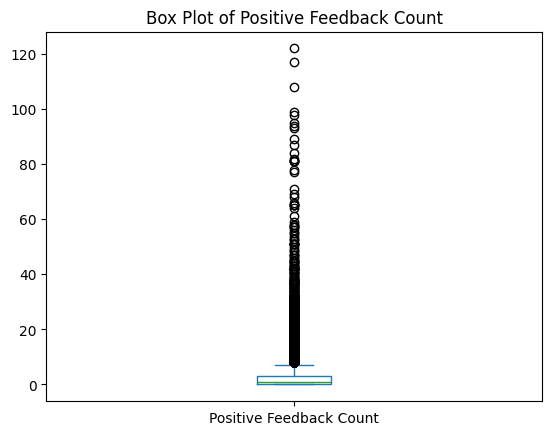

In [ ]:
# Keep an eye out for outliers!

import matplotlib as mpl

df.describe()
#df['Age'].nunique()
#df['Age'].unique()
q1 = np.percentile(df['Positive Feedback Count'], 25)
q3 = np.percentile(df['Positive Feedback Count'], 75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
outliers = df['Positive Feedback Count'][(df['Positive Feedback Count'] < lower_bound) | (df['Positive Feedback Count'] > upper_bound)]
print(f"Outliers using IQR: {outliers}")
# Shocked to learn that there's 2,147 entries outside of the IQR

df['Positive Feedback Count'].plot(kind='box', title='Box Plot of Positive Feedback Count')
# We can see this in the box plot


What techniques helped you find outliers? In your opinion, what about the techniques you used made them effective?

In [ ]:
# Make your notes here:

# Using .describe() I can see that all min / max values for each column is reasonable
# The averages are reasonable, as well as the spread of data
# I dug into Positive Feedback Count more as the max was higher on that one
# It may be explained by trending items receiving more reviews
# Just to check, I used the IQR method
# Since there were so many entries outside of the IQR, I wanted to visualize it
# I added a box plot using matplotlib
# I believe this techqinue was effective because it painted a clearer picture of the data
# It's also a well-recognized statistical method

## Unnecessary Data

Unnecessary data could be irrelevant to your analysis or a duplice column. Check out the dataset to see if there is any unnecessary data.

In [60]:
# Look out for unnecessary data!
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Did you find any unnecessary data in your dataset? How did you handle it?

In [ ]:
# Make your notes here.

# The only unnecessary data I see is column Unnamed: 0, which is just an index.
# I tried to delete this column, but I don't have luck deleting these types of columns, regardless of what I try
# It's not hurting anything to let it stay this time

# We want to keep outliers in case they're of interest to us in analysis
# We can filter them out when necessary without deleting anything

# While some columns (ie - department and class names) seem to have similar data, in the real world,
# those columns would have different uses, so we wouldn't want to change, update, or merge these

## Inconsistent Data

Inconsistent data is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [64]:
# Look out for inconsistent data!

df['Age'].unique()
df['Class Name'].unique()
df['Department Name'].unique()
df['Division Name'].unique()
df['Positive Feedback Count'].unique()
df['Rating'].unique()
df['Recommended IND'].unique()

# May as well make Recommended IND a boolean while we're here
df['Recommended IND'] = df['Recommended IND'].astype('bool')
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND              bool
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

Did you find any inconsistent data? What did you do to clean it?

In [ ]:
# Make your notes here!

# No duplicate values with extra white space / alternate cases / misspellings
# Using dtpyes earlier in the file, we see that columns are appropriate value types as well
# Just for fun I turned the recommended indicator column into boolean values